In [17]:
#Recognizing Handwritten Digits on MNIST Dataset using KNN
#image procesing and pattern recognization
#potential development -- cursive writing analysis --no sepparation between characters
#https://towardsdatascience.com/https-medium-com-rachelwiles-have-we-solved-the-problem-of-handwriting-recognition-712e279f373b
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
def extract_and_process_data():
    data_frame=pd.read_csv('train.csv').values
    x_train,y_train,x_test,y_test=train_test_split(data_frame)
    return x_train,y_train,x_test,y_test

In [19]:
def train_test_split(data_frame):
    x_values=data_frame[:,1:]
    y_values=data_frame[:,0]
    split= int(0.8*x_values.shape[0])
    x_train=x_values[:split,:]
    y_train=y_values[:split]
    x_test=x_values[split:,:]
    y_test=y_values[split:]
    return x_train,y_train,x_test,y_test

In [20]:
def euclidian_distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

In [21]:
def KNN_Model(x,y,xtest_val,k=5):
    distances=[]
    for i in range(x.shape[0]):
        distances.append((euclidian_distance(x[i],xtest_val),y[i]))
    #print(distances)
    distances=sorted(distances)
    distances=distances[:k]
    distances=np.array(distances)
    frequency_count=np.unique(distances[:,1],return_counts=True)
    index=int(frequency_count[1].argmax())
    y_pred=frequency_count[0][index]
    return y_pred

In [22]:
def draw_image(pixel_values,digit_value):
    image=pixel_values.reshape((28,28))
    plt.imshow(image,cmap='gray')
    plt.show()
    #print("The actual value is :   ",digit_value)

In [26]:
def get_accuracy(y_test,y_pred):
    accuracy=0.0
    accuracy=np.sum(y_pred==y_test)/y_pred.shape[0]
    return accuracy
    

In [29]:
def main():
    x_train,y_train,x_test,y_test=extract_and_process_data()
    #print(y_test)
    y_test_list=[]
    y_pred_list=[]
    for i in range(20):
        index=np.random.randint(0,x_test.shape[0])
        draw_image(x_test[index],y_test[index])
        y_pred=KNN_Model(x_train,y_train,x_test[index])
        print(y_pred)
        y_test_list.append(y_test[index])
        y_pred_list.append(y_pred)
    
    accuracy=get_accuracy(np.array(y_test_list),np.array(y_pred_list))
    print("\n\nThe overall Accuracy :    ",accuracy)
        

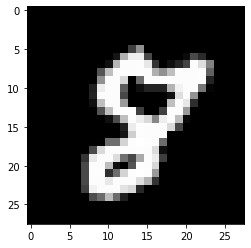

8.0


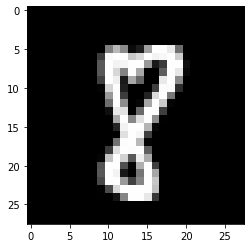

8.0


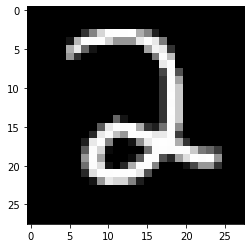

2.0


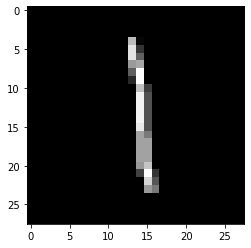

1.0


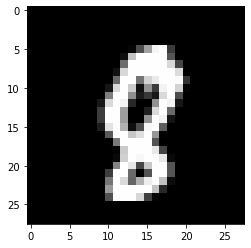

8.0


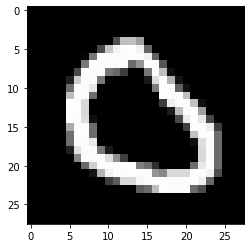

0.0


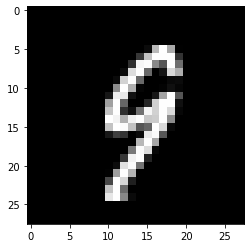

9.0


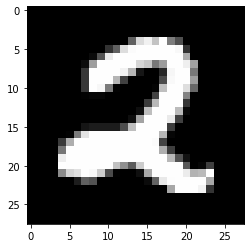

2.0


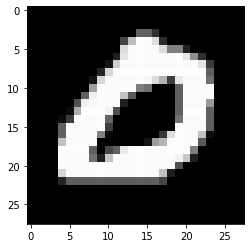

0.0


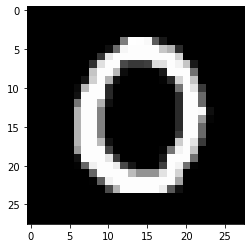

0.0


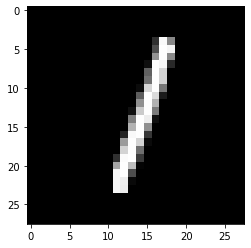

1.0


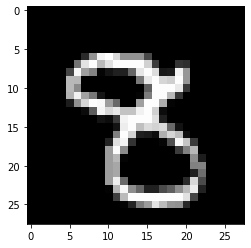

8.0


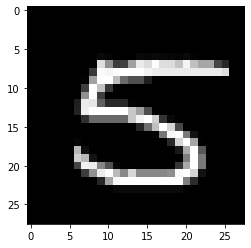

5.0


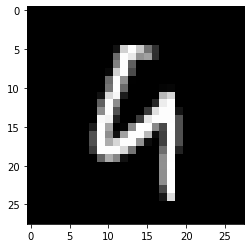

4.0


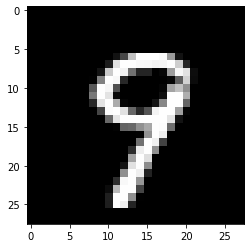

9.0


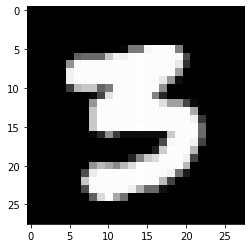

3.0


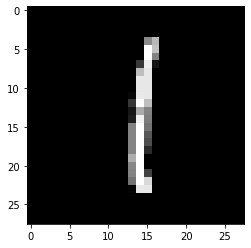

1.0


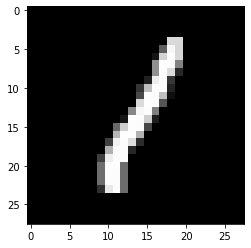

1.0


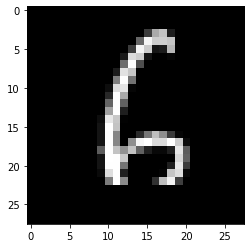

6.0


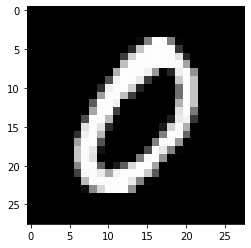

0.0


The overall Accuracy :     0.95


In [30]:
if __name__=='__main__':
    main()